In [1]:
import tensorflow_privacy
import tensorflow as tf
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
import sklearn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,4)})

# Data Cleaning

1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

In [4]:
df = pd.read_csv('bottle.csv')

c:\Users\58386\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df = df[['T_degC','Salnty', 'STheta','O2ml_L','Depthm']]

In [6]:
df.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)


In [7]:
df = df.dropna()
df.shape

(661268, 5)

3) Remove any STheta outliers (same as HW #1).
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

C:\Users\58386\AppData\Local\Temp/ipykernel_9992/2588158861.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


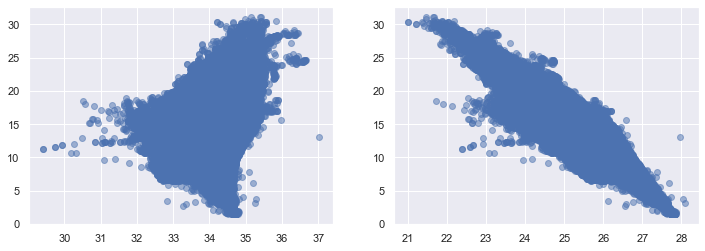

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].scatter(df.Salnty, df.T_degC, alpha=0.5)

ax[1].scatter(df.STheta, df.T_degC, alpha=0.5)

fig.show()

In [9]:
df = df[df['STheta']<200]
df.shape
# Outliers for STheta have been removed due to NAs in new features. 

(661268, 5)

In [10]:
df.to_csv('data.csv',index=False)

# Introduce incorrect data/outliers/gaps

In [11]:
df.describe()

,T_degC,Salnty,STheta,O2ml_L,Depthm
count,661268.000000,661268.000000,661268.000000,661268.000000,661268.00000
mean,10.917560,33.832800,25.797882,3.416076,219.73400
std,4.224529,0.460338,1.009609,2.068615,311.15039
min,1.440000,29.402000,20.996000,-0.010000,0.00000
25%,7.800000,33.480000,24.941000,1.400000,49.00000
50%,10.160000,33.854000,25.972000,3.470000,125.00000
75%,14.010000,34.184800,26.634000,5.510000,300.00000
max,31.140000,37.034000,28.083000,11.130000,5351.00000


In [12]:
# introduce 10% total data size of outliers
dirty_df = df.copy()

ncolumns = len(dirty_df.columns)

# num_dirty = round(len(df)*0.1)
num_dirty = 1000

for i in range(num_dirty):
    noise = np.random.randint(0 , 100 , ncolumns)
    dirty_df.loc[len(dirty_df)+i]=noise
    #df.append(noise)

In [13]:
df

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.300,33.0300,25.36400,5.900,0
1,18.460,32.9200,23.56800,6.020,6
2,10.290,32.9510,25.30400,6.040,10
3,10.290,32.9900,25.33500,6.060,15
4,10.330,33.0050,25.33900,6.040,20
...,...,...,...,...,...
661263,18.744,33.4083,23.87055,5.805,0
661264,18.744,33.4083,23.87072,5.805,2
661265,18.692,33.4150,23.88911,5.796,5
661266,18.161,33.4062,24.01426,5.816,10


In [14]:
dirty_df

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.30,33.030,25.364,5.90,0
1,18.46,32.920,23.568,6.02,6
2,10.29,32.951,25.304,6.04,10
3,10.29,32.990,25.335,6.06,15
4,10.33,33.005,25.339,6.04,20
...,...,...,...,...,...
663258,44.00,23.000,48.000,66.00,53
663260,57.00,20.000,37.000,57.00,83
663262,47.00,67.000,88.000,87.00,7
663264,29.00,50.000,16.000,18.00,79


In [16]:
dirty_df.to_csv('data.csv',index=False)

## EDA

In [ ]:
df = pd.read_csv('data.csv')

C:\Users\58386\AppData\Local\Temp/ipykernel_9992/2148426757.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


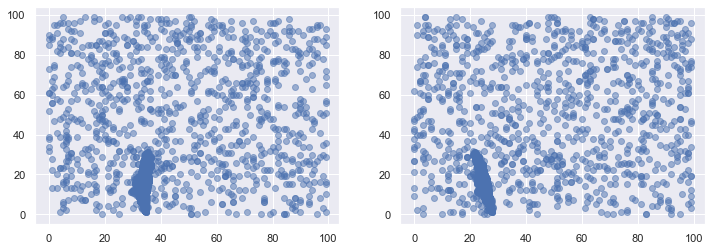

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].scatter(df.Salnty, df.T_degC, alpha=0.5)

ax[1].scatter(df.STheta, df.T_degC, alpha=0.5)

fig.show()

# Train / Test Split & Scaling

1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

In [17]:
# X,y=df.drop(['T_degC'],axis=1),df['T_degC']
X,y=df.drop(['T_degC'],axis=1),df['T_degC']

In [18]:
y.shape

(662268,)

2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

 3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

Additional info on scaling with train & test sets: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i (Links to an external site.)

The easiest approach is to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (Links to an external site.)

You should create two new X objects:
- X_train_scaled
- X_test_scaled.

Note: X_test_scaled must use the scaling parameters learned from training data.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
X_train_scaled

array([[-0.63343959, -0.2923997 ,  0.30191964, -0.5555831 ],
       [ 0.13812617,  0.36580064, -0.48413191, -0.06225205],
       [-0.21469661, -0.29743267,  0.4604794 , -0.38791503],
       ...,
       [-0.16525648, -0.037396  ,  0.03540431, -0.46530029],
       [ 0.14336983,  0.41613031, -0.32894577,  0.09896724],
       [-0.32481328, -0.28848517,  0.49084191, -0.47819784]])

In [22]:
scaler = StandardScaler() 
scaler.fit(X_test)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
X_test_scaled

array([[-0.58981481, -0.50861355,  0.77247201, -0.46173362],
       [-0.37569254, -0.92918134,  0.7589785 , -0.63668738],
       [ 0.26116374, -0.33610184,  0.59030958, -0.27723693],
       ...,
       [ 0.40207508,  0.65894124, -0.95807105,  0.88063887],
       [-0.04978587,  0.21187656, -0.05737905, -0.22316031],
       [ 0.26195096,  0.5242017 , -0.80289565,  0.25398631]])

## Build Linear Regression Model with sklearn

In [ ]:
# fit model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

In [ ]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)

In [ ]:
# model evaluation

# test
test_mse = MSE(y_test, y_pred_sklearn)
print(f"Test set RMSE:", test_mse)


In [67]:
def compare_three(y_test,y_pred,y_train,y_pred_train):
    test_mse = MSE(y_test, y_pred)
    train_mse = MSE(y_train, y_pred_train)
    print(f"Test set MSE:", test_mse)
    print(f"Train set MSE:", train_mse)

    test_r2=sklearn.metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
    train_r2=sklearn.metrics.r2_score(y_train, y_pred_train, sample_weight=None, multioutput='uniform_average')

    print(f"Test set R2:", test_r2)
    print(f"Train set R2:", train_r2)

    test_ev= sklearn.metrics.explained_variance_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
    train_ev= sklearn.metrics.explained_variance_score(y_train, y_pred_train, sample_weight=None, multioutput='uniform_average')

    print(f"Test set explained variance:", test_ev)
    print(f"Train set explained variance:", train_ev)

In [ ]:
compare_three(y_test,y_pred_sklearn,y_train,y_pred_train)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## Build DP Model with TensorFlow

In [56]:
epochs = 3
batch_size = 250

l2_norm_clip = 1.5
noise_multiplier = 1.3
num_microbatches = 1
learning_rate = 0.25

if batch_size % num_microbatches != 0:
  raise ValueError('Batch size should be an integer multiple of the number of microbatches')

In [57]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=[4])
])

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics = [tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.Accuracy()])

model.fit(X_train_scaled, y_train, epochs=5)

In [64]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=[4])
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics = [tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.Accuracy()])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
16557/16557 [==============================] - 22s 1ms/step - loss: 10.4192 - mean_squared_error: 10.4192 - accuracy: 0.0000e+00
Epoch 2/5
16557/16557 [==============================] - 24s 1ms/step - loss: 10.5796 - mean_squared_error: 10.5796 - accuracy: 0.0000e+00
Epoch 3/5
16557/16557 [==============================] - 29s 2ms/step - loss: 10.6037 - mean_squared_error: 10.6037 - accuracy: 0.0000e+00
Epoch 4/5
16557/16557 [==============================] - 79s 5ms/step - loss: 10.5667 - mean_squared_error: 10.5667 - accuracy: 0.0000e+00
Epoch 5/5
16557/16557 [==============================] - 17s 1ms/step - loss: 10.3197 - mean_squared_error: 10.3197 - accuracy: 0.0000e+00


In [65]:
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)


In [66]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=X_train_scaled.shape[0],
                                              batch_size=batch_size,
                                              noise_multiplier=noise_multiplier,
                                              epochs=epochs,
                                              delta=1e-5)

DP-SGD with sampling rate = 0.0472% and noise_multiplier = 1.3 iterated over 6358 steps satisfies differential privacy with eps = 0.319 and delta = 1e-05.
The optimal RDP order is 25.0.


(0.31944565301469846, 25.0)

Test set MSE: 8.387733878634958
Train set MSE: 8.038217140444663
Test set R2: 0.6129807025446459
Train set R2: 0.6250075731160157
Test set explained variance: 0.6129958593993872
Train set explained variance: 0.6250077350181352


Text(0, 0.5, 'y_pred')

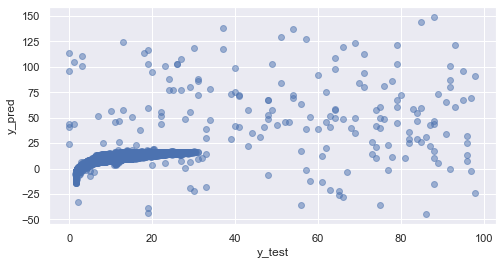

In [68]:
compare_three(y_test,y_pred,y_train,y_pred_train)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

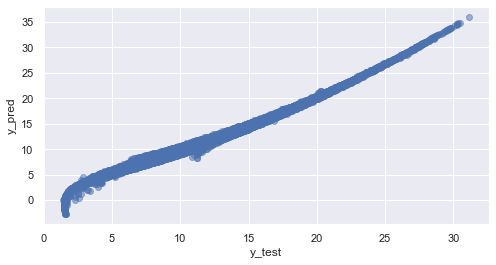

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()